In [4]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.initializers import he_normal, RandomNormal, Constant
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import time

# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize images
train_images = x_train.astype('float32') / 255
test_images = x_test.astype('float32') / 255

# Transform labels to one-hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

model = Sequential()

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, kernel_regularizer='l2', kernel_initializer=he_normal()))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization(momentum=0.95, epsilon=0.005, beta_initializer=RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=Constant(value=0.9)))
model.add(Dense(100, activation='softmax', kernel_regularizer='l2'))

model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=10, min_lr=1e-6)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

# Training model
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=100,
                    epochs=350,
                    validation_data=(X_validation, y_validation),
                    callbacks=[lr_scheduler],
                    verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_22 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_21 (Activation)  (None, 32, 32, 256)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_23 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_22 (Activation)  (None, 32, 32, 256)      

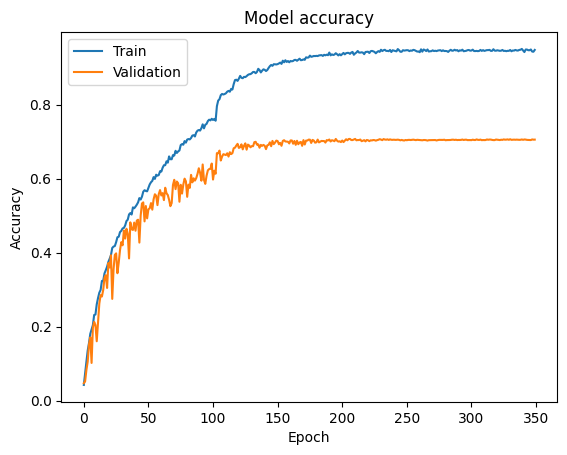

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()